1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,linregress
import pandas as pd
import seaborn as sns
import scipy

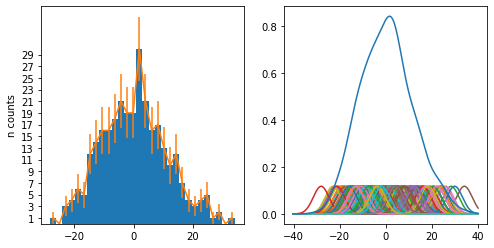

In [ ]:
N=300
x_std = 10
x_mean = 0
x = np.random.normal(x_mean,x_std,N)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))
y, bins, _ = ax1.hist(x,3*x_std)
ax1.set_ylabel('n counts')
ax1.set_yticks(np.arange(1,y.max()+1,2))
bin_centers = 0.5*(bins[1:] + bins[:-1])
ax1.errorbar(bin_centers, y, yerr = y**0.5) 

gaussian_sum = None
x_space = np.linspace(x_mean-4*x_std,x_mean+4*x_std, 1000)
for mean in x:
  f = norm(loc=mean, scale=1.06*x_std*(len(x)**(-0.2)))
  ax2.plot(x_space, f.pdf(x_space))
  try: gaussian_sum+=f.pdf(x_space)
  except: gaussian_sum=f.pdf(x_space)

ax2.plot(x_space,gaussian_sum*(scipy.integrate.trapz(y)/scipy.integrate.trapz(gaussian_sum)))

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

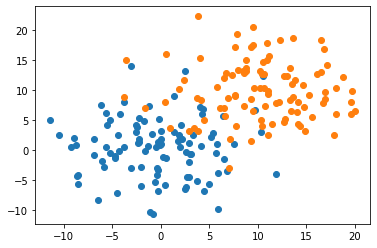

In [ ]:
categories={'A':[0,5],
            'B':[10,5]}
l=[]
for c in categories.keys():
  for e in np.random.normal(categories[c][0],categories[c][1],(100,100)):
    l.append([c,e[0],e[1]])

df=pd.DataFrame(l,columns=['label','x','y'])
df
groups = df.groupby('label')
for name, group in groups:
    plt.scatter(group.x, group.y, label=name)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [ ]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2020-11-23 15:06:08--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2020-11-23 15:06:09--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf73ad4ad631e0adf6f3a10a148.dl.dropboxusercontent.com/cd/0/inline/BDurqbssjdsy_k6YEJyEo2fQe_MnZT06zno1u4-8holS9Wn31Rck9Gkzgdi_wgkDWBoH4eG_RMFi3-rru_ceGmuoJd1r9130avbJX8o05IozGQ/file# [following]
--2020-11-23 15:06:09--  https://ucf73ad4ad631e0adf6f3a10a148.dl.dropboxusercontent.com/cd/0/inline/BDurqbssjdsy_k6YEJyEo2fQe_MnZT06zno1u4-8holS9Wn31Rck9Gkzgdi_wgkDWBoH4eG_RMFi3-rru_ceGmuoJd1r9130avbJX8o05IozGQ/file
Reso

LinregressResult(slope=0.0032597701220305835, intercept=-0.15432816763069473, rvalue=0.04340351052255908, pvalue=8.717037183576464e-06, stderr=0.0007327014008445791)


<ErrorbarContainer object of 3 artists>

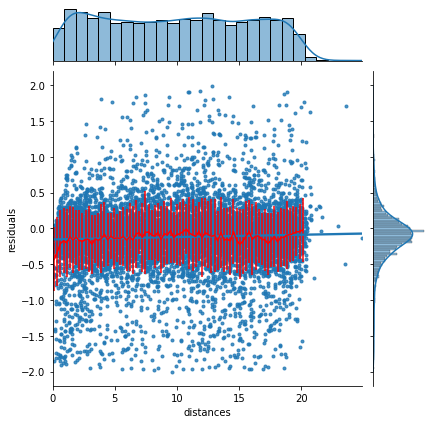

In [22]:
df=pd.DataFrame(np.load('residuals_261.npy',allow_pickle=True).item())
df=df[df['residuals'].abs() <2]
print(linregress(df['distances'],df['residuals']))
n_bins=80
x=np.linspace(0,20,n_bins)+20/(n_bins*2)
indices=np.digitize(df['distances'],x)
y=np.asarray([df['residuals'][indices==i].mean() for i in range(n_bins)])
erry=np.asarray([df['residuals'][indices==i].std() for i in range(n_bins)])
sns.jointplot(x="distances", y="residuals", data=df, kind="reg", marker=".")
plt.errorbar( x, y, yerr=erry, fmt='r')